In [1]:
import pandas as pd 
import numpy as np
import tensorflow as tf
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df=pd.read_csv(r"C:\Users\anupa\Downloads\Python\Deep Learning to AI\NLP_text mining\News_Fraud_detection_file.csv")
df

,Unnamed: 0,id,title,author,text,label
0,0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",0
1,2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,0
2,3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",1
3,4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,1
4,6,20806,Pelosi Calls for FBI Investigation to Find Out...,Pam Key,"Sunday on NBC’s “Meet the Press,” House Minori...",1
...,...,...,...,...,...,...
4684,5874,25994,Trump on If ’Tapes’ Exist of Comey Conversatio...,Pam Key,Pres. Trump on if “tapes” exist of his convers...,1
4685,5875,25995,The Bangladeshi Traffic Jam That Never Ends - ...,Jody Rosen,Of all the dysfunctions that plague the world’...,0
4686,5876,25996,John Kasich Signs One Abortion Bill in Ohio bu...,Sheryl Gay Stolberg,WASHINGTON — Gov. John Kasich of Ohio on Tu...,1
4687,5877,25997,"California Today: What, Exactly, Is in Your Su...",Mike McPhate,Good morning. (Want to get California Today by...,0


In [3]:
df=df.drop(["id","Unnamed: 0"], axis=1)

In [4]:
df

,title,author,text,label
0,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",0
1,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,0
2,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",1
3,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,1
4,Pelosi Calls for FBI Investigation to Find Out...,Pam Key,"Sunday on NBC’s “Meet the Press,” House Minori...",1
...,...,...,...,...
4684,Trump on If ’Tapes’ Exist of Comey Conversatio...,Pam Key,Pres. Trump on if “tapes” exist of his convers...,1
4685,The Bangladeshi Traffic Jam That Never Ends - ...,Jody Rosen,Of all the dysfunctions that plague the world’...,0
4686,John Kasich Signs One Abortion Bill in Ohio bu...,Sheryl Gay Stolberg,WASHINGTON — Gov. John Kasich of Ohio on Tu...,1
4687,"California Today: What, Exactly, Is in Your Su...",Mike McPhate,Good morning. (Want to get California Today by...,0


In [5]:
df["features"]=df["title"]+df["author"]+df["text"]
df

,title,author,text,label,features
0,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",0,"Specter of Trump Loosens Tongues, if Not Purse..."
1,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,0,#NoDAPL: Native American Leaders Vow to Stay A...
2,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",1,"Tim Tebow Will Attempt Another Comeback, This ..."
3,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,1,Keiser Report: Meme Wars (E995)Truth Broadcast...
4,Pelosi Calls for FBI Investigation to Find Out...,Pam Key,"Sunday on NBC’s “Meet the Press,” House Minori...",1,Pelosi Calls for FBI Investigation to Find Out...
...,...,...,...,...,...
4684,Trump on If ’Tapes’ Exist of Comey Conversatio...,Pam Key,Pres. Trump on if “tapes” exist of his convers...,1,Trump on If ’Tapes’ Exist of Comey Conversatio...
4685,The Bangladeshi Traffic Jam That Never Ends - ...,Jody Rosen,Of all the dysfunctions that plague the world’...,0,The Bangladeshi Traffic Jam That Never Ends - ...
4686,John Kasich Signs One Abortion Bill in Ohio bu...,Sheryl Gay Stolberg,WASHINGTON — Gov. John Kasich of Ohio on Tu...,1,John Kasich Signs One Abortion Bill in Ohio bu...
4687,"California Today: What, Exactly, Is in Your Su...",Mike McPhate,Good morning. (Want to get California Today by...,0,"California Today: What, Exactly, Is in Your Su..."


In [6]:
df=df.drop(["title","author","text"], axis=1)
df

,label,features
0,0,"Specter of Trump Loosens Tongues, if Not Purse..."
1,0,#NoDAPL: Native American Leaders Vow to Stay A...
2,1,"Tim Tebow Will Attempt Another Comeback, This ..."
3,1,Keiser Report: Meme Wars (E995)Truth Broadcast...
4,1,Pelosi Calls for FBI Investigation to Find Out...
...,...,...
4684,1,Trump on If ’Tapes’ Exist of Comey Conversatio...
4685,0,The Bangladeshi Traffic Jam That Never Ends - ...
4686,1,John Kasich Signs One Abortion Bill in Ohio bu...
4687,0,"California Today: What, Exactly, Is in Your Su..."


In [7]:
features=df.iloc[:,-1]
labels=df.iloc[:,0]

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [9]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(features)
word_index=tokenizer.word_index
vocab_len=len(word_index)
print(vocab_len)

105288


In [10]:
from nltk.stem import WordNetLemmatizer
lemm=WordNetLemmatizer()
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))

In [11]:
for i in range(features.shape[0]):
    clean_data=" "
    features[i]=re.sub("[^a-z A-Z]", ' ', features[i])
    features[i]=features[i].lower()
    words=nltk.word_tokenize(features[i])
    words=[j for j in words if not j in stop_words]
    for word in words:
        clean_data=clean_data+" " + str(lemm.lemmatize(word))
    features[i]=clean_data

c:\users\anupa\myenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\anupa\myenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\users\anupa\myenv\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [12]:
features

0         specter trump loosens tongue purse string si...
1         nodapl native american leader vow stay winte...
2         tim tebow attempt another comeback time base...
3         keiser report meme war e truth broadcast net...
4         pelosi call fbi investigation find russian d...
                              ...                        
4684      trump tape exist comey conversation tell may...
4685      bangladeshi traffic jam never end new york t...
4686      john kasich sign one abortion bill ohio veto...
4687      california today exactly sushi new york time...
4688      awkward sex onscreen new york timesteddy way...
Name: features, Length: 4689, dtype: object

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
tfidf=TfidfVectorizer(use_idf=True)
tf_idf_vectors=tfidf.fit_transform(features)

In [15]:
tf_idf_vectors[0]

<1x69693 sparse matrix of type '<class 'numpy.float64'>'
	with 480 stored elements in Compressed Sparse Row format>

In [16]:
# get the first vector out (for the first document)
first_vector_tfidfvectorizer=tf_idf_vectors[0]

# place tf-idf values in a pandas data frame
dframe = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf.get_feature_names(), columns=["tfidf"])
dframe.sort_values(by=["tfidf"],ascending=False)

,tfidf
mr,0.305787
tech,0.280772
silicon,0.274695
valley,0.242558
venture,0.242002
...,...
freeloader,0.000000
freely,0.000000
freeman,0.000000
freemanhome,0.000000


In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(tf_idf_vectors, labels, test_size=0.2, random_state=0)

In [18]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
k=log.fit(x_train, y_train)

In [19]:
yp=log.predict(x_test)

In [20]:
y_train

1329    0
3122    0
2487    0
408     0
4653    0
       ..
1033    0
3264    0
1653    1
2607    1
2732    0
Name: label, Length: 3751, dtype: int64

In [21]:
yp

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,

In [22]:
from sklearn import datasets, linear_model, metrics 
print("Logistic Regression model accuracy(in %):",  
metrics.accuracy_score(y_test, yp)*100) 

Logistic Regression model accuracy(in %): 83.68869936034116


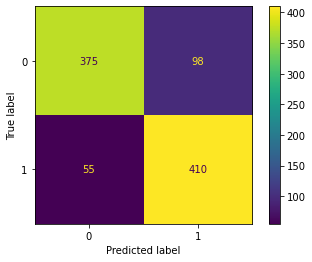

In [23]:
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(k, x_test, y_test)  
plt.show()

In [24]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(features)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(features)
training_padded = pad_sequences(training_sequences, maxlen=1000, padding="post", truncating="post")

In [25]:
training_padded

array([[ 8885,     3, 26639, ...,     0,     0,     0],
       [10720,  1387,    16, ...,     0,     0,     0],
       [ 2500, 10721,   700, ...,     0,     0,     0],
       ...,
       [  254,  4034,   438, ...,     0,     0,     0],
       [  441,   172,  1096, ...,     0,     0,     0],
       [ 5117,  1311, 11106, ...,     0,     0,     0]])

In [26]:
voc_length=len(word_index)

In [27]:
voc_length

69718

In [28]:
x_train1, x_test1, y_train1, y_test1=train_test_split(training_padded, labels, test_size=0.2, random_state=0)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.layers import GlobalAveragePooling1D

In [30]:
model= Sequential()
model.add(Embedding(voc_length+1, 32, input_length=1000))
model.add(GlobalAveragePooling1D())
model.add(Dense(50, activation="sigmoid"))
model.add(Dense(1, activation="relu"))
model.compile(loss="binary_crossentropy", optimizer="RMSProp", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 32)          2231008   
_________________________________________________________________
global_average_pooling1d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 50)                1650      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 2,232,709
Trainable params: 2,232,709
Non-trainable params: 0
_________________________________________________________________


In [31]:
history= model.fit(x_train1, y_train1, validation_data=(x_test1, y_test1), epochs=5 ,verbose=1)

Epoch 1/5
118/118 [==============================] - 3s 27ms/step - loss: 0.5821 - accuracy: 0.7795 - val_loss: 0.3665 - val_accuracy: 0.9211
Epoch 2/5
118/118 [==============================] - 3s 28ms/step - loss: 0.4160 - accuracy: 0.9374 - val_loss: 0.4479 - val_accuracy: 0.9051
Epoch 3/5
118/118 [==============================] - 3s 27ms/step - loss: 0.4490 - accuracy: 0.9491 - val_loss: 0.3839 - val_accuracy: 0.9467
Epoch 4/5
118/118 [==============================] - 3s 27ms/step - loss: 0.4152 - accuracy: 0.9619 - val_loss: 0.3619 - val_accuracy: 0.9552
Epoch 5/5
118/118 [==============================] - 3s 27ms/step - loss: 0.3997 - accuracy: 0.9635 - val_loss: 0.3494 - val_accuracy: 0.9616


In [32]:
yp1=model.predict(x_test1)

In [33]:
for i in range(yp1.shape[0]):
    if(yp1[i]>0.5):
        yp1[i]=1
    else:
        yp1[i]=0
        
yp1

array([[0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],

In [35]:
table=pd.DataFrame(y_test1)
table["pred"]=yp1
table

,label,pred
291,0,0.0
2111,0,0.0
3937,1,1.0
3211,1,1.0
898,0,0.0
...,...,...
3554,0,0.0
4394,0,0.0
2087,1,1.0
4509,0,0.0
